In [81]:
# !python -m pip install --upgrade pip
# !python -m pip install git+https://github.com/AbnerErnaniADSFatec/eocubes
# !python -m pip install git+https://github.com/brazil-data-cube/wlts.py@b-0.6
# !python -m pip install ipywidgets
# !python -m pip install seaborn

In [82]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import wlts
import datetime
%matplotlib inline

from eocube import DataCube, Image, info, config

config.ACCESS_TOKEN = "a6gB61oddyHxMAZ08y098ynEq0s1hQ3siDZao245CV"
service_wlts = wlts.WLTS('https://brazildatacube.dpi.inpe.br/wlts/')

In [3]:
info.collections()

stac("https://brazildatacube.dpi.inpe.br/stac/")

In [4]:
info.describe("CB4_64_16D_STK-1")

name,common_name,min,max,nodata,scale,data_type
BAND13,blue,0.0,10000.0,-9999.0,0.0001,int16
BAND14,green,0.0,10000.0,-9999.0,0.0001,int16
BAND15,red,0.0,10000.0,-9999.0,0.0001,int16
BAND16,nir,0.0,10000.0,-9999.0,0.0001,int16
CLEAROB,ClearOb,1.0,255.0,0.0,1.0,uint8
CMASK,quality,0.0,4.0,255.0,1.0,uint8
EVI,evi,-10000.0,10000.0,-9999.0,0.0001,int16
NDVI,ndvi,-10000.0,10000.0,-9999.0,0.0001,int16
PROVENANCE,Provenance,1.0,366.0,-1.0,1.0,int16
TOTALOB,TotalOb,1.0,255.0,0.0,1.0,uint8


In [83]:
%%time
eodatacube = DataCube(
    collections=["CB4_64_16D_STK-1"],
    query_bands=['red', 'green', 'blue', 'nir', 'evi', 'ndvi'],
    bbox=[-65.9614567, -8.3474771, -59.8097337, -12.8460981],
    start_date="2015-01-01",
    end_date="2019-12-31",
    limit=100
)

CPU times: user 384 ms, sys: 82.7 ms, total: 467 ms
Wall time: 11.2 s


In [84]:
dates = []
for date in list(eodatacube.data_images.keys()):
    dates.append(date.strftime("%Y-%m-%d"))
dates.reverse()
f"{len(dates)} images"

'25 images'

In [85]:
nir = eodatacube.select(band="nir",time=dates[20])

In [97]:
nir.values[0]

array([[3784, 3768, 3728, ..., 4596, 4736, 4762],
       [3832, 3814, 3708, ..., 4589, 4623, 4735],
       [3854, 3880, 3773, ..., 4655, 4749, 4791],
       ...,
       [4204, 4147, 4126, ..., 3335, 3429, 3532],
       [4122, 4179, 4148, ..., 3283, 3393, 3487],
       [4123, 4139, 4134, ..., 5479, 3300, 3387]], dtype=int16)

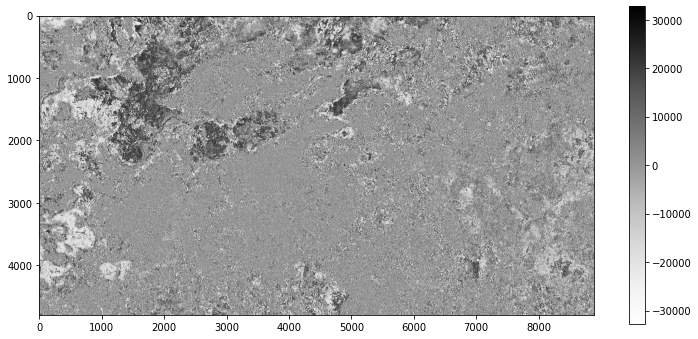

In [98]:
plt.figure(figsize=(10, 5))
colormap = plt.get_cmap('Greys', 1000)
plt.imshow(
    nir.values[0] * 100,
    cmap=colormap
)
plt.tight_layout()
plt.colorbar()

plt.show()

In [99]:
histogram, bin_edges = np.histogram(nir.values[0], bins=256)

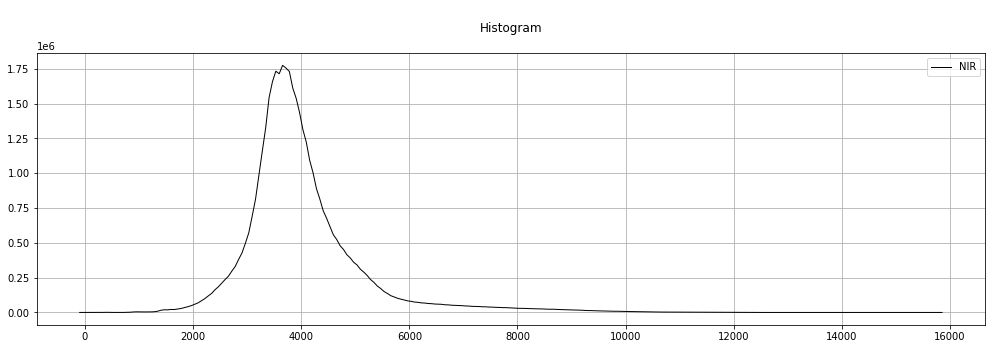

In [100]:
plt.figure(figsize=(17,5))
plt.title(f"\nHistogram\n")
plt.plot(bin_edges[0:-1], histogram, color="black", linewidth=1, label='NIR')
plt.legend()
plt.grid()
plt.show()

In [101]:
eodatacube.data_images, len(eodatacube.data_images)

({datetime.datetime(2019, 12, 19, 0, 0): <eocube.image.Image at 0x7f6bf2f98850>,
  datetime.datetime(2019, 12, 3, 0, 0): <eocube.image.Image at 0x7f6bf2f98cd0>,
  datetime.datetime(2019, 11, 17, 0, 0): <eocube.image.Image at 0x7f6bf2f98fd0>,
  datetime.datetime(2019, 11, 1, 0, 0): <eocube.image.Image at 0x7f6bc6902220>,
  datetime.datetime(2019, 10, 16, 0, 0): <eocube.image.Image at 0x7f6bc6902520>,
  datetime.datetime(2019, 9, 30, 0, 0): <eocube.image.Image at 0x7f6bc6902820>,
  datetime.datetime(2019, 9, 14, 0, 0): <eocube.image.Image at 0x7f6bc6902b20>,
  datetime.datetime(2019, 8, 29, 0, 0): <eocube.image.Image at 0x7f6bc6902e20>,
  datetime.datetime(2019, 8, 13, 0, 0): <eocube.image.Image at 0x7f6bc6903160>,
  datetime.datetime(2019, 7, 28, 0, 0): <eocube.image.Image at 0x7f6bc6903460>,
  datetime.datetime(2019, 7, 12, 0, 0): <eocube.image.Image at 0x7f6bc6903760>,
  datetime.datetime(2019, 6, 26, 0, 0): <eocube.image.Image at 0x7f6bc6903a60>,
  datetime.datetime(2019, 6, 10, 0, 0

In [40]:
# Image._afimPointsToCoord?
sample_img = eodatacube.data_images[datetime.datetime(2019, 12, 19, 0, 0)]
sample_img._afimPointsToCoord(1081, 1081, "nir")

(-65.35154719709688, -8.989352010154533)

In [41]:
time_series = eodatacube.getTimeSeries(
    band='nir', lon=-65.86642239520384, lat=-8.447916311382915
)
time_series

<xarray.DataArray ['TimeSeries_NIR'] (time: 25)>
array([3485, 7091, 5048, 3241, 3120, 7895, 3099, 2154, 4579, 3595, 3721,
       3243, 3048, 3324, 3331, 3444, 3188, 3277, 3490, 3500, 3567, 4617,
       3860, 3779, 4863], dtype=int16)
Coordinates:
  * time     (time) datetime64[ns] 2018-12-03 2018-12-19 ... 2019-12-19
Attributes:
    longitude:  -65.86642239520384
    latitude:   -8.447916311382915

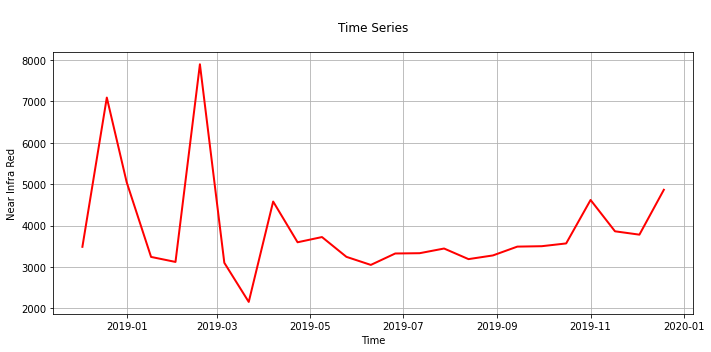

In [42]:
x = time_series.time
y = time_series

plt.figure(figsize=(10,5))
plt.title(f"\nTime Series\n")
plt.xlabel('Time')
plt.ylabel('Near Infra Red')
plt.plot(x, y, color="red", linewidth=2)
plt.tight_layout()
plt.grid()
plt.show()

In [102]:
lon=-65.86642239520384
lat=-8.447916311382915
tj = service_wlts.tj(latitude=lat, longitude=lon)

In [103]:
tj.trajectory[0]

{'class': 'Vegetação Florestal',
 'collection': 'ibge_cobertura_uso_terra',
 'date': '2000'}